In [1]:
import math as mt
import matplotlib.animation as anim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd
import warnings
warnings.filterwarnings("ignore")

In [2]:
def f(x):
    return (x - 1) * (x - 2) * (x - 3) * (x - 5)

Data created successfully


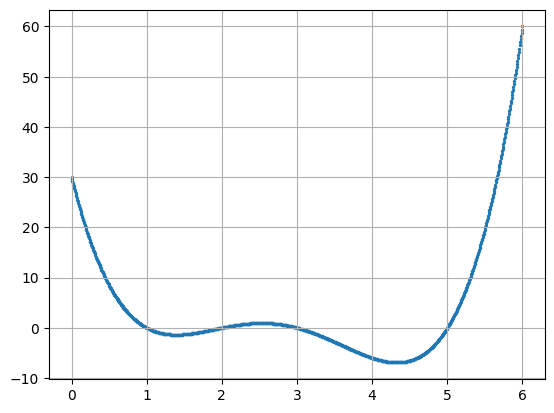

In [3]:
# Create data
x_data = np.linspace(0,6,1000)
y_data = f(x_data)
print('Data created successfully')

# Display the function
plt.scatter(x_data[::1], y_data[::1], s=2)
plt.grid()

In [4]:
def df(x):
    return 4 * x**3 - 33 * x**2 + 82 * x - 61

In [5]:
def gradientDescent(x_0, gamma, maxIter):
    k = 0

    x_data = pd.Series([])
    y_data = pd.Series([])

    x = x_0
    x_data.at[k] = x
    y_data.at[k] = f(x)

    for i in range(k, maxIter+1):
        x = x - gamma * df(x)
        x_data.at[i] = x
        y_data.at[i] = f(x)

    return x_data, y_data

x_gD, y_gD = gradientDescent(6,0.01,20)

# Plot de position of the last point found
print (x_gD.iloc[-1],y_gD.iloc[-1])

4.3293250299391 -6.9140031012849255


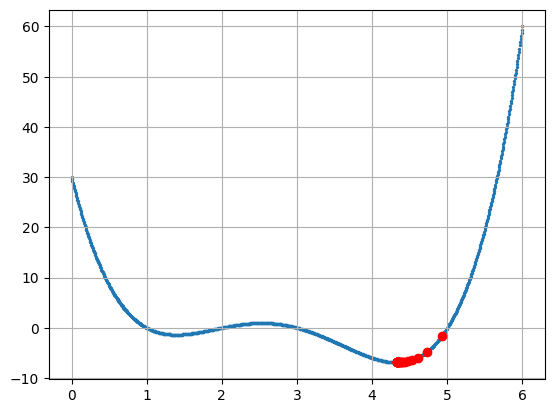

In [6]:
plt.scatter(x_data, y_data, s=2)
plt.grid()
plt.plot(x_gD, y_gD, 'ro')
plt.show()


In [7]:
#rd.seed(2024)

def simulatedAnnealing(x_0, T_0, lengthT_level, alpha, maxT_level):
    k = 0

    x_data = pd.Series(dtype=float)
    y_data = pd.Series(dtype=float)
    T = pd.Series(dtype=float)

    x = x_0
    T_current = T_0

    for level in range(maxT_level):
        for i in range(lengthT_level):
            x_data.at[k] = x
            y_data.at[k] = f(x)
            T.at[k] = T_current

            # Générer une solution voisine
            y = x + rd.uniform(-0.5, 0.5)
            y = min(6, max(0, y))

            delta = f(y) - f(x)

            if delta < 0 or rd.random() < mt.exp(-delta / T_current):
                x = y

            k += 1

        T_current = T_current * alpha  # Refroidissement

    return x_data, y_data


x_sA, y_sA = simulatedAnnealing(0,100,25,0.75,100)

# Plot de position of the last point found
print (x_sA.iloc[-1],y_sA.iloc[-1])

4.326331673115454 -6.914096786762968


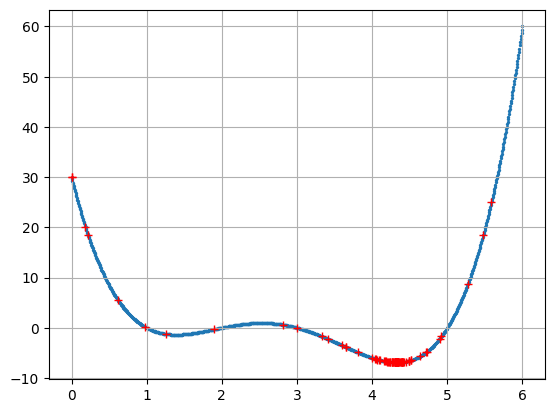

In [8]:
plt.scatter(x_data, y_data, s=2)
plt.grid()
plt.plot(x_sA[::10], y_sA[::10], 'r+')
plt.show()

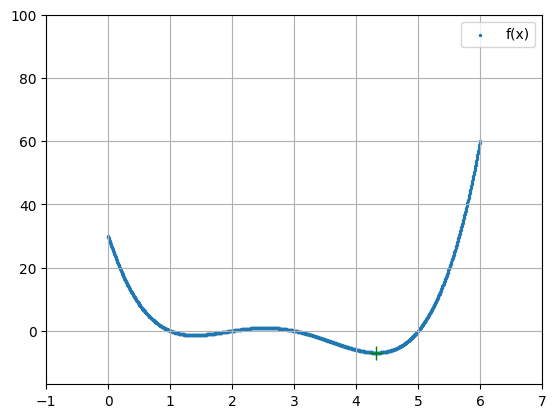

In [9]:
fig = plt.figure()
ax = plt.axes(xlim=(-1, 7), ylim=(min(y_data) - 10, 100))

line, = ax.plot([], [], color='green', linestyle='solid', linewidth=2, marker='+', markerfacecolor='blue', markersize=10)

plt.scatter(x_data, y_data, s=2, label="f(x)")
plt.grid()

def init():
    line.set_data([], [])
    return line,

def animate(i):
    xdata = x_sA.iloc[i]
    ydata = y_sA.iloc[i]
    line.set_data([xdata], [ydata])
    return line,

ani = anim.FuncAnimation(fig, animate, frames=x_sA.size - 1, init_func=init, blit=True)

ani.save('animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.legend()
plt.show()